# Image Processing With Machine Learning
Date: 23 December 2019
<br> Course: Convolutional Neural Netwroks for Image Processing 
<br> link: https://www.datacamp.com/courses/convolutional-neural-networks-for-image-processing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from keras.utils import normalize
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from keras.models import Sequential

Using TensorFlow backend.


# Tracking the Learning Process

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> اینجا کانسپت ها خیلی خفنی رو نمی خوایم بحث کنیم بلکه میخوایم فقط یاد بدیم که چطور پروسه ی یادگیری مدلت رو ترک کنی
            <br> قبلا یه چیزایی یاد گرفتیم ولی حالا می خوایم یه کم حرفه ای تر بررسی کنیم و مفهوم چک پوینت رو هم معرفی کنیم
            <br> برای اینکار باید یه دیتاست و یه مدل واقعی داشته باشیم که باهاش کارکنیم. بنابراین من دیتا رو دوباره توی این نوت بوک هم لود میکنم و برای اینکار کلا کد رو از نوت بوک فصل قبل کپی میکنم

In [4]:
# A function offered by the website itself to read the data batches
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch_training_01 = unpickle('cifar-10-batches-py/data_batch_1')

batch01_data = batch_training_01.pop(b'data')
batch01_label = batch_training_01.pop(b'labels')

def gray_batch_converter(batch01_data):
    gray = lambda rgb: np.dot(rgb[:,:,:3], [0.299 , 0.587, 0.114])
    batch01_data_gs = np.zeros((10000,1024),dtype = 'uint8')
    row_number = 0
    for row in batch01_data:
        img_cl = np.zeros((32,32,3),dtype='uint8')
        img_cl[:,:,0] = row[0:1024].reshape(32,32)
        img_cl[:,:,1] = row[1024:2048].reshape(32,32)
        img_cl[:,:,2] = row[2048:3072].reshape(32,32)    
        img_gs = gray(img_cl)
        batch01_data_gs[row_number] = img_gs.reshape(1,1024)
        row_number = row_number + 1
    return batch01_data_gs

batch01_data_gs = gray_batch_converter(batch01_data)

train_input = batch01_data_gs[0:9500,0:1024]
train_output = batch01_label[0:9500]
test_input = batch01_data_gs[9500:10000,0:1024]
test_output = batch01_label[9500:10000]

train_output_ohe = to_categorical(train_output)
test_output_ohe = to_categorical(test_output)

from keras.utils import normalize
train_input_norm = normalize(train_input)
test_input_norm = normalize(test_input)

train_input_norm_img = train_input_norm.reshape(9500,32,32,1)
test_input_norm_img = test_input_norm.reshape(500,32,32,1)

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> در حین ترینینگ همینطور که وزن ها آپدیت میشن، توابع لاس هم باید هی مقدارشون کم و کمتر بشن این نشون می ده که ترینینگ داره درست اتفاق میفته. هر دو تابع لاس منظورم هست. هم ولیدیشن لاس هم ترینینگ لاس. اگه ترینینگ لاس کم بشه ولی ولیدیشن کم نشه این یعنی اوورفیتینگ اتفاق افتاده

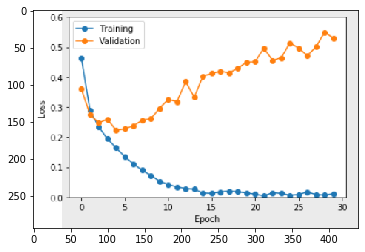

In [3]:
overfit_diagram = plt.imread('Photos\overfitting.PNG')
plt.imshow(overfit_diagram)

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> خب مثلا همین شکل نشون میده که ما از ایپوک سوم داشتیم به براهه میرفتیم و خبر نداشتیم. یعنی داشتیم وزن هامون رو به طور هرز آپدیت میکردیم

In [8]:
model_test = Sequential()
model_test.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(32,32,1)))
model_test.add(MaxPooling2D(2))
model_test.add(Flatten())
model_test.add(Dense(10, activation='relu'))


model_test.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

stats = model_test.fit(train_input_norm_img, train_output_ohe, epochs = 20, validation_split=0.2)

Train on 7600 samples, validate on 1900 samples
Epoch 1/20
7600/7600 [==============================] - 6s 837us/step - loss: 10.4512 - acc: 0.1637 - val_loss: 9.2420 - val_acc: 0.0879
Epoch 2/20
7600/7600 [==============================] - 5s 670us/step - loss: 6.6095 - acc: 0.1607 - val_loss: 6.3236 - val_acc: 0.1700
Epoch 3/20
7600/7600 [==============================] - 5s 674us/step - loss: 6.1297 - acc: 0.2153 - val_loss: 6.2928 - val_acc: 0.2153
Epoch 4/20
7600/7600 [==============================] - 5s 672us/step - loss: 6.1173 - acc: 0.2261 - val_loss: 6.3265 - val_acc: 0.2347
Epoch 5/20
7600/7600 [==============================] - 5s 662us/step - loss: 6.1043 - acc: 0.2326 - val_loss: 6.3704 - val_acc: 0.1858
Epoch 6/20
7600/7600 [==============================] - 5s 685us/step - loss: 6.0599 - acc: 0.2189 - val_loss: 6.2256 - val_acc: 0.2216
Epoch 7/20
7600/7600 [==============================] - 5s 714us/step - loss: 6.0814 - acc: 0.2380 - val_loss: 6.2231 - val_acc: 0.2316

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> همانطور که دیدی من خروجی فیت رو در یک متغیر ذخیره کردم. این متغیر یه دیکشنری هست که پارامتر ها و نتایج ترینینگ رو در خود ذخیره میکند
            <br> حالا می تونم لاس رو هم در ترینینگ و هم در ولیدیشن رسم کنم

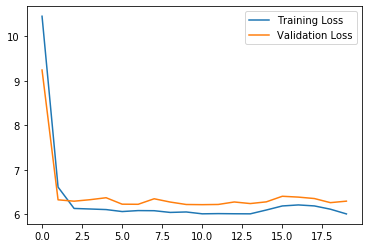

In [20]:
plt.plot(stats.history['loss'], label='Training Loss')
plt.plot(stats.history['val_loss'], label='Validation Loss')
plt.legend()

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> که خب برای ما اینجا اوورفیتینگ اتفاق نیفتاد
            <br> حالا سوال اینه که چطور از اوورفیتینگ جلوگیری کنیم. چطور پارامترهامون رو طوری انتخاب کنیم که از اوورفیتینگ جلوگیری کنیم؟ 
            <br> راهش اینه که از یه سری کالبک هایی در کراس استفاده کنیم که یه سری توابعی دارند که می تونند در انتهای هر ایپوک ران بشن و بهمون بگن که دنیا دست کیه
            <br> یکی از اینها اسمش مدل چک پوینت هست. این کال بک فانکشن وزن ها رو ذخیره میکنه ( در یک فایل با پسوند اچ دی اف فایو) و ولیدیشن لاس رو مانیتور میکنه و تنها وقتی که بهبودی در ولیدیشن لاس حاصل شد وزن ها رو اوور رایت میکنه
            <br> و این یعنی اینکه اگه شبکه یهویی اوورفیت کرد. مدل وزن های مربوط به کنترین مقدار لاس رو ذخیره میکنه
            <br> چطور استفاده میکنیم؟
            <br> یه چک پوینت آبجکت ازش میسازیم. اون رو در یک لیست ذخیره میکنیم. در موقع فیت کردن، اون رو  به مدل میدیم

In [22]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)
callbacks_list = [checkpoint]

stats1 = model_test.fit(train_input_norm_img, train_output_ohe, epochs=20, validation_split=0.2, callbacks=callbacks_list)

Train on 7600 samples, validate on 1900 samples
Epoch 1/20
7600/7600 [==============================] - 6s 732us/step - loss: 6.0842 - acc: 0.2229 - val_loss: 6.3122 - val_acc: 0.2289
Epoch 2/20
7600/7600 [==============================] - 6s 736us/step - loss: 6.0969 - acc: 0.2205 - val_loss: 6.3318 - val_acc: 0.2479
Epoch 3/20
7600/7600 [==============================] - 6s 724us/step - loss: 5.9789 - acc: 0.2778 - val_loss: 6.3522 - val_acc: 0.2542
Epoch 4/20
7600/7600 [==============================] - 5s 710us/step - loss: 5.9648 - acc: 0.2863 - val_loss: 6.4449 - val_acc: 0.2642
Epoch 5/20
7600/7600 [==============================] - 5s 679us/step - loss: 5.9272 - acc: 0.3024 - val_loss: 6.5429 - val_acc: 0.2732
Epoch 6/20
7600/7600 [==============================] - 5s 677us/step - loss: 5.9180 - acc: 0.3178 - val_loss: 6.3729 - val_acc: 0.2658
Epoch 7/20
7600/7600 [==============================] - 5s 691us/step - loss: 5.9454 - acc: 0.3024 - val_loss: 6.3001 - val_acc: 0.2679


C:\Users\Shahrokh\Anaconda3\envs\tf\lib\site-packages\keras\callbacks.py:436: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):


7600/7600 [==============================] - 5s 667us/step - loss: 5.9155 - acc: 0.3141 - val_loss: 6.5847 - val_acc: 0.2800
Epoch 15/20
7600/7600 [==============================] - 10s 1ms/step - loss: nan - acc: 0.2784 - val_loss: nan - val_acc: 0.1074
Epoch 16/20
7600/7600 [==============================] - 18s 2ms/step - loss: nan - acc: 0.0989 - val_loss: nan - val_acc: 0.1074
Epoch 17/20
7600/7600 [==============================] - 19s 3ms/step - loss: nan - acc: 0.0989 - val_loss: nan - val_acc: 0.1074
Epoch 18/20
7600/7600 [==============================] - 19s 2ms/step - loss: nan - acc: 0.0989 - val_loss: nan - val_acc: 0.1074
Epoch 19/20
7600/7600 [==============================] - 19s 2ms/step - loss: nan - acc: 0.0989 - val_loss: nan - val_acc: 0.1074
Epoch 20/20
7600/7600 [==============================] - 19s 3ms/step - loss: nan - acc: 0.0989 - val_loss: nan - val_acc: 0.1074


<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> وقتی که همه ی مراحل و همه ی ایپوک های ترینینگ انجام شد، اونوقت این فایل یعنی همین فایل با پسوند اچ دی اف فایو حاوی بهترین وزن ها هست. حالا سوال اینه که چطوری ازش استفاده کنیم؟ 
            <br> هیچی خیلی راحت. می تونی یه مدل و که ساختی. دیگه اون رو ترین نکنی و به جای ترین کردن این وزن های ذخیره شده رو روش لود کنی
            <br> فرض کن که من  مدل1 رو ساختم حالا می خوام وزن ها رو روش لود کنم (که البته فک کنم به این صورت هست که باید دقیقا همون استراکچر رو داشته باشه دیگه) 

In [ ]:
model1.load_weights('weights.hdf5')

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> به همین راحتی. این الآن آماده ست. شما به راحتی میتونی باهاش پیش بینی انجام بدی

# Regularization: A Way to prevent overfitting

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> در واقع رگولاریزیشن راهی است برای جلوگیری از اوور فیتینگ و اینکه بهمون اجازه میده که بهترین نتیجه رو از ترینینگمون بگیریم. که در اینجا دو روش متفاوت برای رگولاریزیشن ارائه خواهد شد. یکی بهش میگن دراپ اوت و یکی دیگه رو بهش میگن بچ نورمالیزیشن
           

# ِDropout

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> بذار اول در مورد دراپ اوت صحبت کنیم
            <br> در روش دراپ اوت، ابتدا یه زیر مجموعه از نورون های داخل یه لایه رو به طور رندوم انتخاب میکنیم و اونها رو 
            بیخیال میشیم. یعنی هم در پروسه ی فوروارد پروپگیشن و هم در پروسه ی بک پروپگیشن در نظر گرفته نخواهند شد

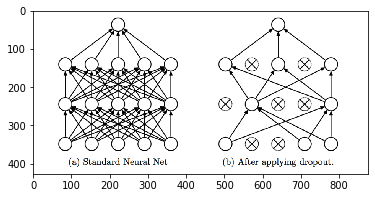

In [24]:
dropout_scheme = plt.imread('Photos\dropout.PNG')
plt.imshow(dropout_scheme)

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> این الآن برای یه استپ ترینینگ داره نشون میده. ممکنه برای استپ بعدی نورون های دیگه ای حذف بشن.
            <br> خب حالا این روش مسخره چطور میتونه به پروسه ی ترینینگ کمک کنه
            <br> با این روش اگه یه بخضشی از شبکه به یه طور نویز در دیتا بیش از حد حساس بشه، پارت دیگه ی شبکه این رو جبران 
            میکنه چون این پارت اصلا اون دیتا با اون نویز رو ندیده
            <br> جور دیگه ای که می تونه کمک کنه اینه که اجازه نمی ده که پاسخ نورون ها به هم مرتبط باشن و با هم کورلیتد باشن 
            مثلا اگه یه نورونی یاد میگیره که خطوط عمودی رو دیتکت کنه و با این روش اجازه نمیدیم که نورون های دیکه هم همون رو 
            یاد بگیرن. با این روش دراپ اوت نورون دیگه چیز دیگه می تونه یاد بگیره و مثلا یاد بگیره خطوط عمودی رو دیتکت کنه
            <br> چطور توی کراس این رو پیاده کنیم؟ 
            <br> هیچی. با کراس. به قول خارجیا ایزی پیزی، جاپونیزی
            <br> در کراس این مانسپت در قالب یه لایه پیاده سازی شده که می تونی اون رو از لایه های کراس ایمپورت کنی و استفاده 
            کنی. بعد از هر لایه ای که می خوای نورون هاش ایگنور بشن می تونی یه لایه ی دراپ اوت بذاری. به عنوان ورودی یه عدد بین 
            صفر و یک میگیره که نشون دهنده ی درصدی از نورون هاست که بیخیالشون میشم
            <br> به نظر من دراپ اوت پروسه ی لرنینگ رو خیلی با دقت تر میکنه و من خیلی دوستش دارم
            
           

In [26]:
from keras.layers import Dropout

shah_classifier5 = Sequential()
shah_classifier5.add(Conv2D(15, kernel_size=3, activation = 'relu', input_shape = (32,32,1), padding='same'))
shah_classifier5.add(Dropout(0.25))
shah_classifier5.add(Flatten())
shah_classifier5.add(Dense(10, activation='softmax'))

shah_classifier5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

shah_stats5 = shah_classifier5.fit(train_input_norm_img, train_output_ohe, epochs=10, validation_split=0.2)

Train on 7600 samples, validate on 1900 samples
Epoch 1/10
7600/7600 [==============================] - 10s 1ms/step - loss: 2.1509 - acc: 0.2204 - val_loss: 2.0636 - val_acc: 0.2784
Epoch 2/10
7600/7600 [==============================] - 8s 1ms/step - loss: 2.0203 - acc: 0.2955 - val_loss: 2.0085 - val_acc: 0.3016
Epoch 3/10
7600/7600 [==============================] - 8s 1ms/step - loss: 1.9760 - acc: 0.3116 - val_loss: 1.9934 - val_acc: 0.3011
Epoch 4/10
7600/7600 [==============================] - 8s 1ms/step - loss: 1.9421 - acc: 0.3361 - val_loss: 1.9658 - val_acc: 0.3168
Epoch 5/10
7600/7600 [==============================] - 8s 1ms/step - loss: 1.9198 - acc: 0.3388 - val_loss: 1.9636 - val_acc: 0.3195
Epoch 6/10
7600/7600 [==============================] - 8s 1ms/step - loss: 1.8891 - acc: 0.3541 - val_loss: 1.9347 - val_acc: 0.3347
Epoch 7/10
7600/7600 [==============================] - 8s 1ms/step - loss: 1.8605 - acc: 0.3678 - val_loss: 1.9298 - val_acc: 0.3426
Epoch 8/10
76

# Batch Normalization

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> استراتژی رگولاریزیشن بعدی ای که می خوایم بهش بپردازیم بچ نورمالیزیشن هست
            <br> در این روش خروجی یه لایه رو میگیریم و اون رو نرمالایز میکنیم. بنابراین همیشه در هر بچ از ترینینگ میانگین آن 
            صفر میمونه و انحراف معیار آن برابر با 1
            <br> در واقع یه مشکلی برای شبکه ها بوده و اون هم اینه که بچ ها ی مختلفی از ورودی منجر به بچ هایی در خروجی میشده 
            اند که انحراف معیار خیلی متفاوتی با هم داشته اند. یعنی یه بچ میومده بیرون  تا 100 ماکزیموم داشته بعد یهو بچ بعدی 
            میومده بیرون تا 10 ماکزیموم داشته و خب اون همگرایی وزن های شبکه رو مختل میکنه و ممکنه پروسه ی لرنینگ خیلی طول 
            بکشه
            <br> بچ نرمالیزیشن اومده تا این مشکل رو حل کنه و مثل همون دراپ اوت در کراس به عنوان یه لایه پیاده سازی شده است
            <br> لایه رو میذاری بعد از اون لایه ای که می خوای خروچی اش نرمالایز بشه. میذاری پشت اون لایه ای که فک میکنی چغره
            

In [43]:
from keras.layers import BatchNormalization

shah_classifier6 = Sequential()
shah_classifier6.add(Conv2D(15, kernel_size=3, activation = 'relu', input_shape = (32,32,1), padding='same'))
shah_classifier6.add(BatchNormalization())
shah_classifier6.add(Flatten())
shah_classifier6.add(Dense(10, activation='softmax'))

shah_classifier6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

shah_stats6 = shah_classifier6.fit(train_input_norm_img, train_output_ohe, epochs=10, validation_split=0.2)

Train on 7600 samples, validate on 1900 samples
Epoch 1/10
7600/7600 [==============================] - 13s 2ms/step - loss: 2.0102 - acc: 0.2971 - val_loss: 2.5453 - val_acc: 0.1700
Epoch 2/10
7600/7600 [==============================] - 9s 1ms/step - loss: 1.6931 - acc: 0.4155 - val_loss: 1.9639 - val_acc: 0.3342
Epoch 3/10
7600/7600 [==============================] - 9s 1ms/step - loss: 1.5195 - acc: 0.4730 - val_loss: 1.9624 - val_acc: 0.3532
Epoch 4/10
7600/7600 [==============================] - 10s 1ms/step - loss: 1.3782 - acc: 0.5251 - val_loss: 2.9475 - val_acc: 0.1953
Epoch 5/10
7600/7600 [==============================] - 9s 1ms/step - loss: 1.2578 - acc: 0.5686 - val_loss: 1.8377 - val_acc: 0.3879
Epoch 6/10
7600/7600 [==============================] - 9s 1ms/step - loss: 1.1610 - acc: 0.6022 - val_loss: 2.2230 - val_acc: 0.3337
Epoch 7/10
7600/7600 [==============================] - 9s 1ms/step - loss: 1.0673 - acc: 0.6405 - val_loss: 2.2506 - val_acc: 0.3542
Epoch 8/10
7

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> حالا باید سر فرصت بشینی خروجی این مدل ها رو مقایسه کنی. من الآن برای تو گفتم اینها چی هستند، به چه درد میخورند و چطور اجرا میشوند

# A Word of Warning

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> بین این دو تا استراتژی رگولاریزیشن، یه دیس هارمونی ای وجود داره و این باعث میشه که دو تا همزمان با هم روی یه 
            شبکه کار نکنند یعنی اگه دو تا رو با هم اعمال کنی شبکه بدتر میشه
            <br> در واقع دراپ اوت پروسه ی لرنینگ رو کند میکنه و بچ نرمالیزیشن سریع و این دو تا گاهی اوقات ممکنه بزنن ویژگی 
            های خوب همدیگه رو داغون کنند و حالا بیا درستش کن. خلاصه گفتم که حواست باشه

# Deciphering The block Box

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> خیلی انتقادات به شبکه ی عصبی وارد میشه از این جهت که همه می گن یه بلک باکسه و ما نمی دونیم چطور کار میکنه و 
            چطور می تونیم به چیزی که نمی تونیم بفهمیم چطور کار می کنه اعتماد کنیم؟
            <br> اما خب خیلی تلاش ها توسط محققان این حوزه داره انجام میشه که کمک کنه به قابلیت تفسیر مدل و در آینده خیلی 
            بیشتر در این مورد خواهیم دید
            <br> یکی از جنبه هاش اینه که بیایم ویژوالایز کنیم اتفاقاتی که بعد از هر بخش از مدل داره میفته
            <br> الآن میخوام به این بپردازیم که چطور میتونیم یه بخض از مدل رو بگیریم و خروجیش رو ببینیم
            <br> با استفاده از این دستور میتونی لایه های موجود رو ببینی و هر کدوم رو که خواستی برای خودت توی یه متغیر جداگانه 
            ذخیره کنی. در واقع وقتی یه مدل رو بیلد میکنی و کامپایل میکنی، لایه هاش رو در یه اتریبیوت به نام لِیِر ذخیره میکنی و با این دستور می تونی یه لیست از لِیِر آبجکت ها بگیری
            

In [44]:
shah_classifier6.layers

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> اگه بخوایم به اولین لایه ی کانولوشن نگاه کنیم می تونیم اون رو به این صورت ذخیره کنیم در یه متغیر
            
            

In [47]:
conv_layer_1 = shah_classifier6.layers[0]

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> یه متد هست که بهمون کمک میکنه که بتونیم به وزن های این لایه دسترسی داشته باشیم
            

In [48]:
weights1 = conv_layer_1.get_weights()
len(weights1)

2

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> المان اول 15 تا آرایه داره که هر کدوم اعداد کرنل کانولوشن رو میده برای هر نورون یعنی 15 تا کاناولوشن کرنل رو میده که بعد از ترینینگ محاسبه شده اند

In [49]:
weights1[0]

array([[[[ 2.64434874e-01,  8.44078138e-02, -5.38164675e-02,
          -2.20860451e-01, -1.67510659e-01,  9.22498852e-02,
          -1.26259252e-01,  3.20445225e-02,  1.18522704e-01,
           6.52875751e-02, -4.36607487e-02,  2.77573973e-01,
          -1.25928968e-01,  1.97323561e-01,  8.77334923e-02]],

        [[-3.11453491e-01, -1.10120356e-01, -7.48678297e-02,
          -1.38249574e-02, -2.56685186e-02,  2.06938654e-01,
           8.07349384e-02, -2.02136263e-01,  1.84257150e-01,
          -3.82429076e-04,  8.08908194e-02,  9.12901610e-02,
           6.92137750e-03, -2.81542301e-01,  2.62887895e-01]],

        [[ 4.30517122e-02, -7.63005987e-02, -9.37894359e-02,
          -7.49247521e-02, -1.62532151e-01, -5.33577427e-02,
           4.81575839e-02,  1.17909350e-01, -2.73571253e-01,
          -2.49033310e-02, -1.06353931e-01,  3.45564514e-01,
           7.05142245e-02, -9.00440812e-02,  4.26426440e-01]]],


       [[[-1.35214195e-01, -1.12925567e-01, -1.15761152e-02,
           1.

In [51]:
weights1[0].shape

(3, 3, 1, 15)

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> این اعداد چیو نشون میدهند؟ 
            <br> دو تای اول که سایز کرنل هست
            <br> عدد سوم تعداد چنل ها هست. که نشون میده یکی هست چون تصویر گری اسکیل بوده و یه چنل داشته
            <br> و عدد آخر هم نشون دهنده ی تعداد کرنل ها در این لایه هست
            <br>
            <br> المان دوم موجود در این لیست وزن خروجی هر نورون در لایه کانولوشن رو میده

In [50]:
weights1[1]

array([ 0.02357905, -0.01212887, -0.02163944,  0.02641501,  0.00443851,
       -0.00037644,  0.01819143,  0.00628777,  0.02237723,  0.01674848,
       -0.00599325, -0.00039775, -0.01019046,  0.00010092,  0.00197045],
      dtype=float32)

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> حالا اگه یه کرنلشو بگیرم می تونم سایزشو ببینم چقدره
            <br> یه کرنل رو اینطوری میگیرن

In [53]:
kernels = weights1[0]
kernel_1 = kernels[:,:,0,0]
kernel_1.shape

(3, 3)

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> حالا می تونیم این کرنل رو به تصویر بکشیم

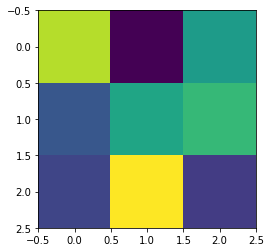

In [54]:
plt.imshow(kernel_1)

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> خب حالا اگه بخوایم ببینیم که ای کرنل چه بلایی سر تصویر میاره میتونی برداری چندتا تصویر ورودی ت رو باهاش کانوالو کنی

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
def convolve2d(image, kernel):
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output

In [63]:
my_test_image = train_input[0].reshape(32,32)
filtered_image = convolve2d(my_test_image, kernel_1)

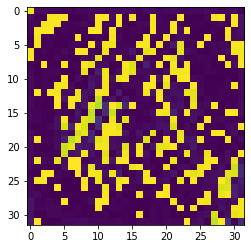

In [64]:
plt.imshow(filtered_image)

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> این طوری هست که این کرنل دنیا رو میبینه
            <br> اگه می خوای بیشتر در مورد این داستان ویژوالایز کردن فیچر ها بفهمی، این پیج خیلی پیج خوبیه

https://distill.pub/2017/feature-visualization/